In [4]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
from scipy.optimize import minimize
import scipy.constants as const

In [5]:
def radial_plotter_file_cubic(file_path, r ,f_val, slope_points):
    data = mass_profile_file(file_path)
    plt.scatter(data[0], data[1])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Radial Distance (kpc)')
    plt.ylabel('M(enclosed) (Msun)')
    plt.title('Enclosed Mass vs. Distance: f = ' + str(f_val) + ', r = '+ str(r))
    plt.ylim(10**(5), 10**(14))
    plt.xlim(10**(-3), 10**(2))
    
    del_x = (data[0][slope_points]) - (data[0][1])
    del_y = (data[1][slope_points]) - (data[1][1])
    slope = del_y/del_x
    print(data[1][slope_points])
    test_r = np.linspace(0, 1000, 1000000)
    cubic =  10**(11)*(4/3)*np.pi*(test_r**3)
    plt.plot(test_r,cubic, 'g')
    plt.legend(['Core Slope = ' + str(slope), 'Test Slope = 3.0'])
    plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/enclosed_mass/r'+ str(r)+ '/f' + str(f_val) + '.png')

In [3]:
path_Inf = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/fInfL20T4n400r400/radial0400.h5'
radial_plotter_file_cubic(path_Inf, 400, 'Inf', 8)

NameError: name 'mass_profile_file' is not defined

198893569.98059484


/home/mnotis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/home/mnotis/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


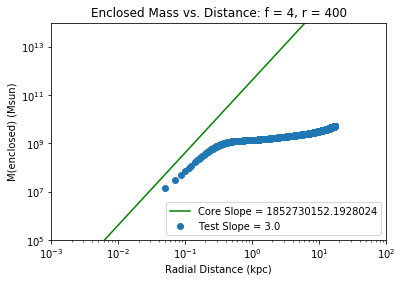

In [13]:
path_4 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f4L20T4n400r400/radial0400.h5'
radial_plotter_file_cubic(path_Inf, 400, 4, 8)

In [7]:
path_Inf = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/fInfL20T4n400r400/radial0400.h5'
hf = h5py.File(path_Inf, 'r')
distInf = np.array(hf['distances'])
densInf = np.array(hf['densities'])
densInfsph = densInf * 4* np.pi*(distInf**2)
print('Inf[8] = ' + str(densInfsph[8]))
path_4 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f2L20T4n400r400/radial0400.h5'
hf2 = h5py.File(path_4, 'r')
dist4 = np.array(hf2['distances'])
dens4 = np.array(hf2['densities'])
dens4sph = dens4 * 4* np.pi*(dist4**2)
print('Four[8] = ' + str(dens4sph[8]))



Inf[8] = 3181986833.3634777
Four[8] = 3948235769.157549


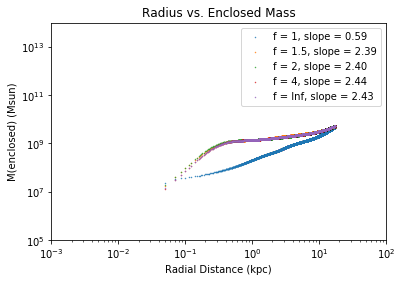

In [8]:
#plotting radial profiles of different densities

#naming file paths

path1 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1L20T4n400r400/radial0200.h5'
#path125 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.25L20T4n40r400/radial0040.h5'
path15 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.5L20T4n400r400/radial0200.h5'
#path175 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.75L20T4n40r400/radial0040.h5'
path2 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f2L20T4n400r400/radial0400.h5'
path4 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f4L20T4n400r400/radial0400.h5'
pathInf ='/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/fInfL20T4n400r400/radial0400.h5'

# making data
data1 = mass_profile_file(path1)
data15 = mass_profile_file(path15)
data2 = mass_profile_file(path2)
data4 = mass_profile_file(path4)
dataInf = mass_profile_file(pathInf)

#plotting data
plt.scatter(data1[0], data1[1], s = 0.20)
plt.scatter(data15[0], data15[1], s = 0.20)
plt.scatter(data2[0], data2[1], s = 0.20)
plt.scatter(data4[0], data4[1], s = 0.20)
plt.scatter(dataInf[0], dataInf[1], s = 0.20)

#computing slopes
del_x1 = np.log10(data1[0][6]) - np.log10(data1[0][1])
del_y1 = np.log10(data1[1][6]) - np.log10(data1[1][1])
slope1 = del_y1/del_x1

del_x15 = np.log10(data15[0][6]) - np.log10(data15[0][1])
del_y15 = np.log10(data15[1][6]) - np.log10(data15[1][1])
slope15 = del_y15/del_x15

del_x2 = np.log10(data2[0][6]) - np.log10(data2[0][1])
del_y2 = np.log10(data2[1][6]) - np.log10(data2[1][1])
slope2 = del_y2/del_x2

del_x4 = np.log10(data4[0][6]) - np.log10(data4[0][1])
del_y4 = np.log10(data4[1][6]) - np.log10(data4[1][1])
slope4 = del_y4/del_x4

del_xInf = np.log10(dataInf[0][6]) - np.log10(dataInf[0][1])
del_yInf= np.log10(dataInf[1][6]) - np.log10(dataInf[1][1])
slopeInf = del_yInf/del_xInf

#parameters for the plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radial Distance (kpc)')
plt.ylabel('M(enclosed) (Msun)')
plt.title('Radius vs. Enclosed Mass')
plt.ylim(10**(5), 10**(14))
plt.xlim(10**(-3), 10**(2))

plt.legend(['f = 1, slope = ' + "%.2f" %slope1, 'f = 1.5, slope = ' + "%.2f" %slope15, 'f = 2, slope = ' + "%.2f" %slope2, 'f = 4, slope = ' + "%.2f" %slope4, 'f = Inf, slope = ' + "%.2f" %slopeInf])

plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/enclosed_mass_r400.png', dpi = 300)
#print(data[1][slope_points])
#test_r = np.linspace(0, 1000, 1000000)
#cubic =  10**(11)*(4/3)*np.pi*(test_r**3)
#plt.plot(test_r,cubic, 'g')

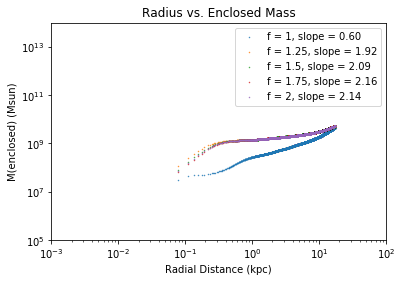

In [9]:
#plotting radial profiles of different densities

#naming file paths

path1 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1L20T4n400r256/radial0400.h5'
path125 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.25L20T4n40r256/radial0040.h5'
path15 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.5L20T4n400r256/radial0400.h5'
path175 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.75L20T4n40r256/radial0040.h5'
path2 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f2L20T4n400r256/radial0400.h5'
#path4 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f4L20T4n400r256/radial0400.h5'
#pathInf ='/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/fInfL20T4n400r256/radial0400.h5'

# making data
data1 = mass_profile_file(path1)
data15 = mass_profile_file(path15)
data2 = mass_profile_file(path2)
data125 = mass_profile_file(path125)
data175 = mass_profile_file(path175)

#plotting data
plt.scatter(data1[0], data1[1], s = 0.20)
plt.scatter(data125[0], data125[1], s = 0.20)
plt.scatter(data15[0], data15[1], s = 0.20)
plt.scatter(data175[0], data175[1], s = 0.20)
plt.scatter(data2[0], data2[1], s = 0.20)

#computing slopes
del_x1 = np.log10(data1[0][6]) - np.log10(data1[0][1])
del_y1 = np.log10(data1[1][6]) - np.log10(data1[1][1])
slope1 = del_y1/del_x1

del_x15 = np.log10(data15[0][6]) - np.log10(data15[0][1])
del_y15 = np.log10(data15[1][6]) - np.log10(data15[1][1])
slope15 = del_y15/del_x15

del_x2 = np.log10(data2[0][6]) - np.log10(data2[0][1])
del_y2 = np.log10(data2[1][6]) - np.log10(data2[1][1])
slope2 = del_y2/del_x2

del_x125 = np.log10(data125[0][6]) - np.log10(data125[0][1])
del_y125 = np.log10(data125[1][6]) - np.log10(data125[1][1])
slope125 = del_y125/del_x125

del_x175 = np.log10(data175[0][6]) - np.log10(data175[0][1])
del_y175= np.log10(data175[1][6]) - np.log10(data175[1][1])
slope175 = del_y175/del_x175

#parameters for the plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radial Distance (kpc)')
plt.ylabel('M(enclosed) (Msun)')
plt.title('Radius vs. Enclosed Mass')
plt.ylim(10**(5), 10**(14))
plt.xlim(10**(-3), 10**(2))

plt.legend(['f = 1, slope = ' + "%.2f" %slope1, 'f = 1.25, slope = ' + "%.2f" %slope125, 'f = 1.5, slope = ' + "%.2f" %slope15, 'f = 1.75, slope = ' + "%.2f" %slope175, 'f = 2, slope = ' + "%.2f" %slope2])

plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/enclosed_mass_r256.png', dpi = 300)
#print(data[1][slope_points])
#test_r = np.linspace(0, 1000, 1000000)
#cubic =  10**(11)*(4/3)*np.pi*(test_r**3)
#plt.plot(test_r,cubic, 'g')

In [ ]:
#plotting radial profiles of different densities

#naming file paths

path1 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1L20T4n400r256/radial0400.h5'
path125 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.25L20T4n40r256/radial0040.h5'
path15 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.5L20T4n400r256/radial0400.h5'
path175 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.75L20T4n40r256/radial0040.h5'
path2 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f2L20T4n400r256/radial0400.h5'
#path4 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f4L20T4n400r256/radial0400.h5'
#pathInf ='/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/fInfL20T4n400r256/radial0400.h5'

# making data
data1 = mass_profile_file(path1)
data15 = mass_profile_file(path15)
data2 = mass_profile_file(path2)
data125 = mass_profile_file(path125)
data175 = mass_profile_file(path175)

#plotting data
plt.scatter(data1[0], data1[1], s = 0.20)
plt.scatter(data125[0], data125[1], s = 0.20)
plt.scatter(data15[0], data15[1], s = 0.20)
plt.scatter(data175[0], data175[1], s = 0.20)
plt.scatter(data2[0], data2[1], s = 0.20)

#computing slopes
del_x1 = np.log10(data1[0][6]) - np.log10(data1[0][1])
del_y1 = np.log10(data1[1][6]) - np.log10(data1[1][1])
slope1 = del_y1/del_x1

del_x15 = np.log10(data15[0][6]) - np.log10(data15[0][1])
del_y15 = np.log10(data15[1][6]) - np.log10(data15[1][1])
slope15 = del_y15/del_x15

del_x2 = np.log10(data2[0][6]) - np.log10(data2[0][1])
del_y2 = np.log10(data2[1][6]) - np.log10(data2[1][1])
slope2 = del_y2/del_x2

del_x125 = np.log10(data125[0][6]) - np.log10(data125[0][1])
del_y125 = np.log10(data125[1][6]) - np.log10(data125[1][1])
slope125 = del_y125/del_x125

del_x175 = np.log10(data175[0][6]) - np.log10(data175[0][1])
del_y175= np.log10(data175[1][6]) - np.log10(data175[1][1])
slope175 = del_y175/del_x175

#parameters for the plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radial Distance (kpc)')
plt.ylabel('M(enclosed) (Msun)')
plt.title('Radius vs. Enclosed Mass')
plt.ylim(10**(5), 10**(14))
plt.xlim(10**(-3), 10**(2))

plt.legend(['f = 1, slope = ' + "%.2f" %slope1, 'f = 1.25, slope = ' + "%.2f" %slope125, 'f = 1.5, slope = ' + "%.2f" %slope15, 'f = 1.75, slope = ' + "%.2f" %slope175, 'f = 2, slope = ' + "%.2f" %slope2])

plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/enclosed_mass_r256.png', dpi = 300)
#print(data[1][slope_points])
#test_r = np.linspace(0, 1000, 1000000)
#cubic =  10**(11)*(4/3)*np.pi*(test_r**3)
#plt.plot(test_r,cubic, 'g')

In [6]:
def mass_profile_time(file_path):
    hf = h5py.File(file_path, 'r')
    dist = np.array(hf['distances'])
    dens = np.array(hf['densities'])
    dens_sphere = dens * 4*np.pi*(dist**2)
    m_enc = np.zeros(len(dens))
    sum = 0
    for i in range(0, len(m_enc) - 1):
        dr = dist[i + 1] - dist[i]
        upper_rect = dens_sphere[i] * dr
        lower_rect = dens_sphere[i + 1] *dr
        trap = (upper_rect + lower_rect) / 2
        sum = sum + trap 
        m_enc[i+ 1] = sum
    return dist, m_enc

In [7]:
def enclosed_mass_time(path, snap_num):
    enclosed_mass = np.zeros(snap_num + 1)
    for i in range(0, snap_num + 1):
        data = mass_profile_time(path + '/radial' + str(i).zfill(4) + '.h5')
        dist = data[0]
        dist_max = 16
        index = 0
        for j in range(0, len(dist)):
            if (dist[j] < dist_max):
                index = j
            else: break
        #|print(index)
        #print(data[1][index])
        enclosed_mass[i] = data[1][index]
    return enclosed_mass

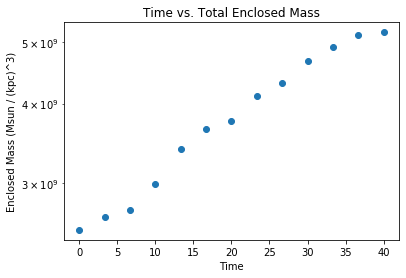

In [8]:
#testing enclosed mass
path1 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1L20T4n40r512'
mass = enclosed_mass_time(path1, 12)
time = np.linspace(0, 40, 13)
plt.scatter(time, mass)
plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('Enclosed Mass (Msun / (kpc)^3)')
plt.title('Time vs. Total Enclosed Mass')

plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/mass_time/f1r512d16.png')

Helper Function for distance

In [9]:
# function that calculates distances between two 3d points:

def get_distance(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2 + (a[2]- b[2])**2)

Mass Calculation Using Pixel Method


In [10]:
#Takes in a number for cube size and returns an array of the distances to center of cube as keys
#and the number of pixels at that distance as values.

def get_pixel_dict(n):
    np.zeros((n, n, n))
    center = n / 2
    dist_num = {}
    for i in range(0, n):
        for j in range(0, n):
            for k in range(0, n):
                dist = get_distance([center, center, center], [i, j, k]) * (20./n)
                if dist not in dist_num:
                    dist_num[dist] = 1
                else:
                    times = dist_num[dist]
                    dist_num[dist] = times + 1
    dist = np.fromiter(dist_num.keys(), dtype=float)
    dist = np.sort(dist)
    nums = np.zeros(len(dist))
    for i in range(0, len(nums)):
        nums[i] = dist_num[dist[i]]
    return dist, nums

In [50]:
# saving the 256 resolution dictionary
path = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020'
dict = get_pixel_dict(256)
hf = h5py.File(path + '/' + 'distpixels256' + '.h5', 'w')
hf.create_dataset('distances', data=dict[0])
hf.create_dataset('pixel number', data=dict[1])
hf.close()

In [27]:
path = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020'
dict = get_pixel_dict(512)
hf = h5py.File(path + '/' + 'distpix512' + '.h5', 'w')
hf.create_dataset('distances', data=dict[0])
hf.create_dataset('pixel number', data=dict[1])
hf.close()

[443.40500674 442.82840921 442.25332107 ...   1.41421356   1.
   0.        ]


In [11]:
#takes in a path, a number for the side of the cube, and a path to a file for the pixel 
# number dictionary and returns the enclosed mass using a pixel method.

def enclosed_mass_pixel_method(path, resolution):
    dictpix = h5py.File('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/distpixels' + 
                           str(resolution) + '.h5', 'r')
    dV = (20./resolution)**3
    dist = np.array(dictpix['distances'])
    pix_nums = np.array(dictpix['pixel number'])
    dist_num = {}
    for i in range(0, len(pix_nums)):
        dist_num[dist[i]] = pix_nums[i]
    
    rad_file = h5py.File(path, 'r')
    distrad = np.array(rad_file['distances'])
    densrad = np.array(rad_file['densities'])
    
    enclosed_mass = np.zeros(len(distrad))
    mass_count = 0
    for i in range(0, len(enclosed_mass)):
        enclosed_mass[i] = mass_count
        mass_count = mass_count + densrad[i]*dV*dist_num[distrad[i]]
    return distrad, enclosed_mass

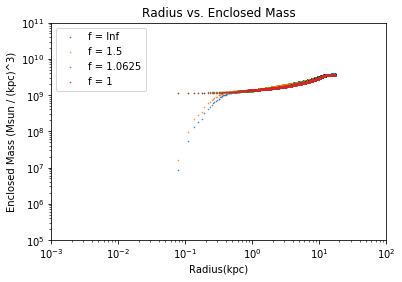

In [11]:
pathInf = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/fInfL20T4n400r256/rad_filesradial0400.h5'
path15 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.5L20T4n400r256/radial0400.h5'
path10625 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.0625L20T4n40r256/radial0040.h5'
path1 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1L20T4n400r256/radial0400.h5'

dataInf = enclosed_mass_pixel_method(pathInf, 256)
data15 = enclosed_mass_pixel_method(path15, 256)
data10625 = enclosed_mass_pixel_method(path10625, 256)
data1 = enclosed_mass_pixel_method(path1, 256)

plt.scatter(dataInf[0], dataInf[1], s = 0.25)
plt.scatter(data15[0], data15[1], s = 0.25)
plt.scatter(data10625[0], data10625[1], s = 0.25)
plt.scatter(data1[0], data1[1], s = 0.25)

plt.xscale('log')
plt.yscale('log')
plt.ylim(10**(5), 10**(11))
plt.xlim(10**(-3), 10**(2))
plt.xlabel('Radius(kpc)')
plt.ylabel('Enclosed Mass (Msun / (kpc)^3)')
plt.title('Radius vs. Enclosed Mass')
plt.legend(['f = Inf', 'f = 1.5', 'f = 1.0625', 'f = 1'])
plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/mass_pixels.png', dpi = 250)

In [25]:
#takes in a path, a number for the side of the cube, and a path to a file for the pixel 
# number dictionary and returns the enclosed mass using a pixel method.

def enclosed_mass_pixel_from_folder(folder_path, resolution, limit, snap_num, files_in_folder):
    masses = np.zeros(snap_num + 1)
    if (folder_path == '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/fInfL20T4n400r256'):
        for i in range(0, 41):
                data = enclosed_mass_pixel_method(folder_path + '/rad_filesradial' + str(i * 10).zfill(4) + '.h5', resolution)
                index = 0
                for j in range(0, len(data[0])):
                    if (data[0][j] < limit): 
                        index = j
                masses[i] = data[1][index]
    else:
        if (files_in_folder == 400):
            for i in range(0, snap_num + 1):
                data = enclosed_mass_pixel_method(folder_path + '/radial' + str(i * 10).zfill(4) + '.h5', resolution)
                index = 0
                for j in range(0, len(data[0])):
                    if (data[0][j] < limit): 
                        index = j
                masses[i] = data[1][index]
        elif (files_in_folder == 40):
            for i in range(0, snap_num + 1):
                data = enclosed_mass_pixel_method(folder_path + '/radial' + str(i).zfill(4) + '.h5', resolution)
                index = 0
                for j in range(0, len(data[0])):
                    if (data[0][j] < limit): 
                        index = j
                masses[i] = data[1][index]
    times = np.linspace(0, snap_num, snap_num + 1)
    return times, masses
                

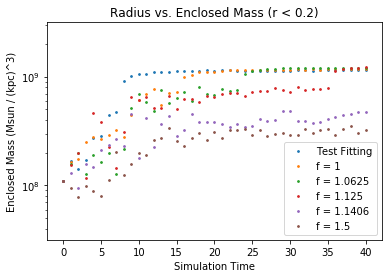

In [44]:
r_lim = 0.2
path1 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1L20T4n400r256'
path10625 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.0625L20T4n40r256'
path1125 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.125L20T4n40r256'
path11406 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.1406L20T4n40r256'
path15 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.5L20T4n400r256'
path15 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.5L20T4n400r256'
pathInf = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/fInfL20T4n400r256'

data1 = enclosed_mass_pixel_from_folder(path1, 256, r_lim, 40, 400)
data10625 = enclosed_mass_pixel_from_folder(path10625, 256, r_lim, 40, 40)
data1125 = enclosed_mass_pixel_from_folder(path1125, 256, r_lim, 40, 40)
data11406 = enclosed_mass_pixel_from_folder(path11406, 256, r_lim, 40, 40)
data15 = enclosed_mass_pixel_from_folder(path15, 256, r_lim, 40, 400)
dataInf = enclosed_mass_pixel_from_folder(pathInf, 256, r_lim, 40, 400)

plt.scatter(data1[0], data1[1], s = 3)
plt.scatter(data10625[0], data10625[1], s = 3)
plt.scatter(data1125[0], data1125[1], s = 3)
plt.scatter(data11406[0], data11406[1], s = 3)
plt.scatter(data15[0], data15[1], s = 3)
plt.scatter(dataInf[0], dataInf[1], s = 3)

'''time  = np.linspace(0,40,41)
dens = np.zeros(41)
for i in range(0,41):
    dens[i] = 1.14e9
plt.plot(time,dens)'''

plt.yscale('log')
plt.ylim(10**(7.5), 10**(9.5))
plt.xlabel('Simulation Time')
plt.ylabel('Enclosed Mass (Msun / (kpc)^3)')
plt.title('Radius vs. Enclosed Mass (r < ' + str(r_lim) + ')')
plt.legend(['Test Fitting', 'f = 1', 'f = 1.0625', 'f = 1.125', 'f = 1.1406', 'f = 1.5', 'f = Inf'])
plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/massr256pixel_scatterR02.png', dpi = 250)

In [39]:
print(data1[1])

[1.09160384e+08 1.69564293e+08 1.40419928e+08 1.70296456e+08
 2.70989831e+08 2.81959904e+08 4.48159414e+08 4.69166981e+08
 9.21119496e+08 1.01413824e+09 1.06050015e+09 1.06295565e+09
 1.10174063e+09 1.11092091e+09 1.10813069e+09 1.12286118e+09
 1.12177484e+09 1.13166856e+09 1.13678582e+09 1.14306220e+09
 1.13363409e+09 1.14716836e+09 1.14551150e+09 1.12636883e+09
 1.12714450e+09 1.13271909e+09 1.13122079e+09 1.13629167e+09
 1.13309981e+09 1.12901164e+09 1.13414538e+09 1.14313982e+09
 1.14169780e+09 1.13317919e+09 1.14191729e+09 1.14628562e+09
 1.14706542e+09 1.14374779e+09 1.14917561e+09 1.14977229e+09
 1.15067885e+09]


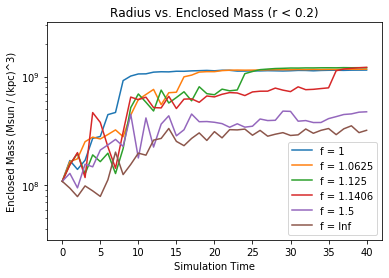

In [38]:
r_lim = 0.2
path1 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1L20T4n400r256'
path10625 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.0625L20T4n40r256'
path1125 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.125L20T4n40r256'
path11406 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.1406L20T4n40r256'
path15 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.5L20T4n400r256'
pathInf = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/fInfL20T4n400r256'

data1 = enclosed_mass_pixel_from_folder(path1, 256, r_lim, 40, 400)
data10625 = enclosed_mass_pixel_from_folder(path10625, 256, r_lim, 40, 40)
data1125 = enclosed_mass_pixel_from_folder(path1125, 256, r_lim, 40, 40)
data11406 = enclosed_mass_pixel_from_folder(path11406, 256, r_lim, 40, 40)
data15 = enclosed_mass_pixel_from_folder(path15, 256, r_lim, 40, 400)
dataInf = enclosed_mass_pixel_from_folder(pathInf, 256, r_lim, 40, 400)

plt.plot(data1[0], data1[1])
plt.plot(data10625[0], data10625[1])
plt.plot(data1125[0], data1125[1])
plt.plot(data11406[0], data11406[1])
plt.plot(data15[0], data15[1])
plt.plot(dataInf[0], dataInf[1])

plt.yscale('log')
plt.ylim(10**(7.5), 10**(9.5))
plt.xlabel('Simulation Time')
plt.ylabel('Enclosed Mass (Msun / (kpc)^3)')
plt.title('Radius vs. Enclosed Mass (r < ' + str(r_lim) + ')')
plt.legend(['f = 1', 'f = 1.0625', 'f = 1.125', 'f = 1.1406', 'f = 1.5', 'f = Inf'])
plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/massr256pixel_smoothR02.png', dpi = 250)